# Convoluties in Python

In dit notebook bekijken we het effect van enkele convoluties door op een eenvoudige manier convoluties te implementeren van een 2D-beeld met één kanaal. 

In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [3]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(img, cmap='gray');

def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[0].axis('off')
    ax[1].imshow(img2, cmap='gray')
    ax[1].axis('off');

def negative_to_zero(img: np.array) -> np.array:
    img = img.copy()
    img[img < 0] = 0
    return img

### Twee aan twee vermenigvuldigen in Numpy

In [4]:
# Vermenigvuldiging in numpy is gemakkelijk
A = np.array([[1.0,2.0, 3.0], [4,5,6],[7,8,9]])
print(f"A = \n{A}")
K = np.array([[0,-1, 0], [-1,5,-1],[0,-1,0]])
print(f"K = \n{K}")
print(f"A * K = \n{A * K}")

A = 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
K = 
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
A * K = 
[[ 0. -2.  0.]
 [-4. 25. -6.]
 [ 0. -8.  0.]]


### De som berekenen met Numpy

De som berekenen met numpy is gemakkelijk. Alle getallen in een array `A` worden opgeteld m.b.v. `np.sum(A)`.



In [5]:
A = np.array([[1.0,2.0, 3.0], [4,5,6],[7,8,9]])
print(f"A = \n{A}")
s = np.sum(A)
print(f"De som van alle getallen in A is {s}")

A = 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
De som van alle getallen in A is 45.0


### Een subset selecteren van een Numpy array

Verander `rij` en `kolom` om te zien wat het effect is.  We selecteren telkens een drie bij drie blokje.

In [6]:
rij = 1
kolom = 2
A = np.arange(36).reshape(6,6)
print(f"A = \n{A}")
blokje = A[rij:rij+3, kolom:kolom+3]
print(f"Rij= {rij} en kolom = {kolom} geeft als 3 bij 3 subset")
print(f"{blokje}")

A = 
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
Rij= 1 en kolom = 2 geeft als 3 bij 3 subset
[[ 8  9 10]
 [14 15 16]
 [20 21 22]]


### Berekenen van een convolutie

Een convolutie is niets anders dan een aantal sommen van componentsgewijze vermenigvuldigingen. 

In [7]:
def bepaal_convolutie(img, kernel: np.array) -> np.array:
  k1, k2 = kernel.shape
  if not isinstance(img, np.ndarray):
    img = np.array(img)
  hoogte, breedte = img.shape
  # Het nieuwe beeld is een klein beetje kleiner
  convolutie = np.zeros(shape=(hoogte - k1 + 1, breedte - k2 + 1))

  for rij in range(convolutie.shape[0]):
    for kolom in range(convolutie.shape[1]):
      subset = img[rij:rij+k1, kolom:kolom+k2]
      # De convolutie op plaats rij en kolom berekenen
      convolutie[rij, kolom] = np.sum(subset * kernel)

  return convolutie

### Convoluties bepalen van een (grijswaarde) afbeelding 

Verander `BESTANDS_NAAM` om te verwijzen naar een afbeelding.

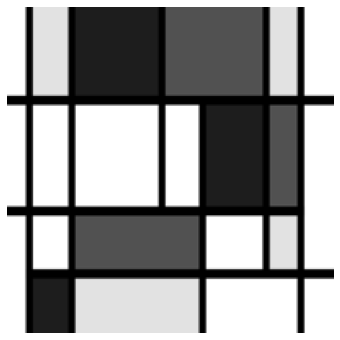

In [20]:
#BESTANDS_NAAM = "hond1000.jpg"
BESTANDS_NAAM = './mondriaan.png'
#BESTANDS_NAAM = "./image-test-edge.png"
img = Image.open(BESTANDS_NAAM).resize((200,200))
img = ImageOps.grayscale(img)
plot_image(img)

We definiëren zelf enkel "kernels".

In [10]:
KERNEL_1 = np.array([[1.0,1,1],[1,1,1],[1,1,1]])/9
KERNEL_2 = np.array([[0.0,-1,0],[-1,5,-1],[0,-1,0]])
KERNEL_3 = np.array([[-1.0,-1,-1],[-1,8,-1],[-1,-1,-1]])
print(f"KERNEL_1 =\n{KERNEL_1}")
print(f"KERNEL_2 =\n{KERNEL_2}")
print(f"KERNEL_3 =\n{KERNEL_3}")

KERNEL_1 =
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
KERNEL_2 =
[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]
KERNEL_3 =
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


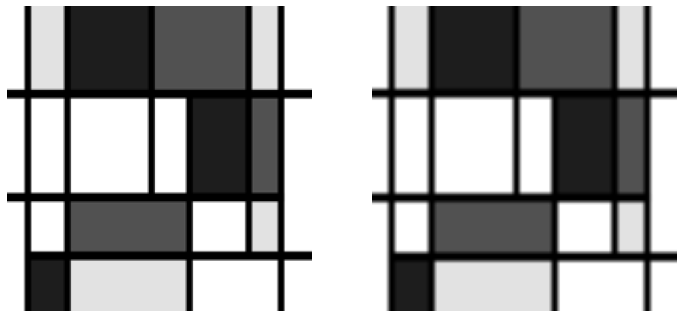

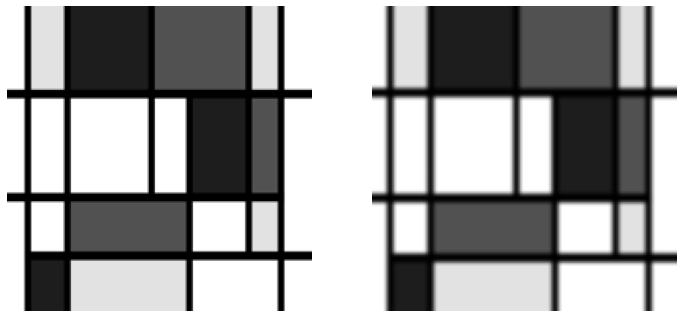

In [21]:
conv1 = bepaal_convolutie(img, KERNEL_1)
plot_two_images(img, conv1)
# Pas de kernel twee keer toe
plot_two_images(img, bepaal_convolutie(conv1, KERNEL_1))

Hoe zou je het effect van deze kernel omschrijven?

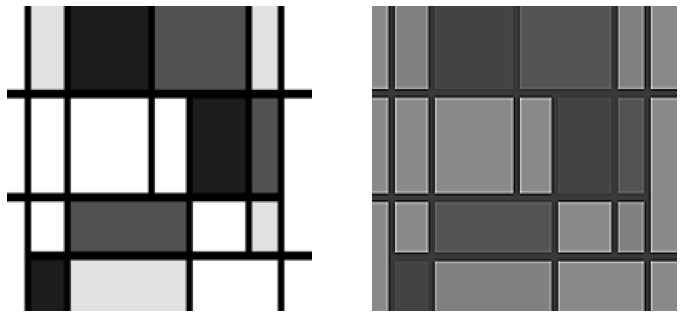

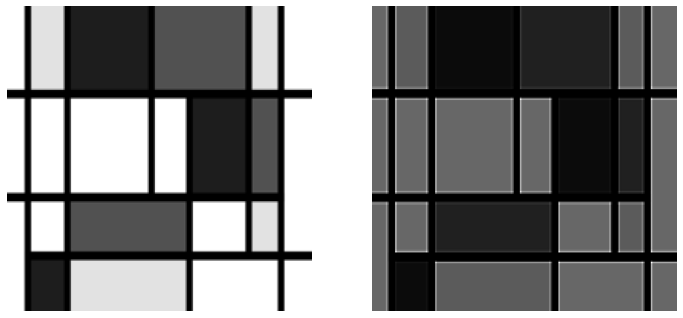

In [22]:
conv2 = bepaal_convolutie(img, KERNEL_2)
plot_two_images(img, conv2)
plot_two_images(img, negative_to_zero(conv2)) # Vervang negatieve waarden door nul om te plotten

Hoe zou je het effect van deze kernel beschrijven?

Bepaal nu het effect van `KERNEL_3`. Schrijf hiertoe de nodige code. (Je kan je hiervoor baseren op de vorige cel.)

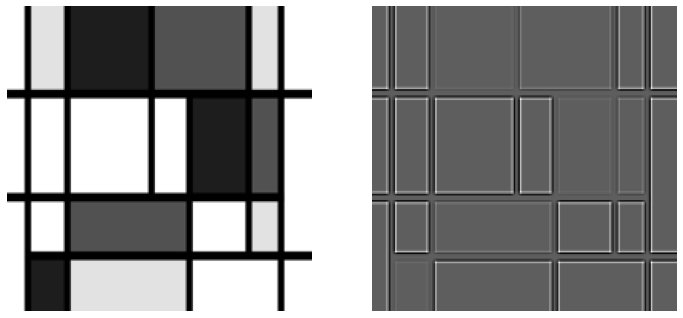

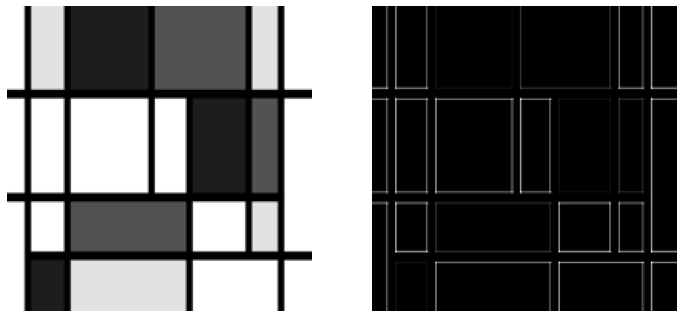

In [23]:
### JOUW CODE HIER

### EINDE JOUW CODE HIER

Beschouw nu de volgende kernels:
$$
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{bmatrix}
$$
en
$$
\begin{bmatrix}
-1 & -1 & -1 \\
0  & 0 & 0 \\
1  & 1 & 1 \\
\end{bmatrix}
$$


- Definieer deze twee kernels en bepaal hun effect. 
- Wat gebeurt er als je de twee kernels na elkaar toepast?

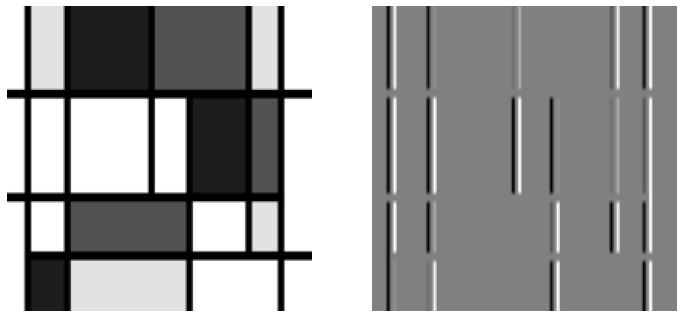

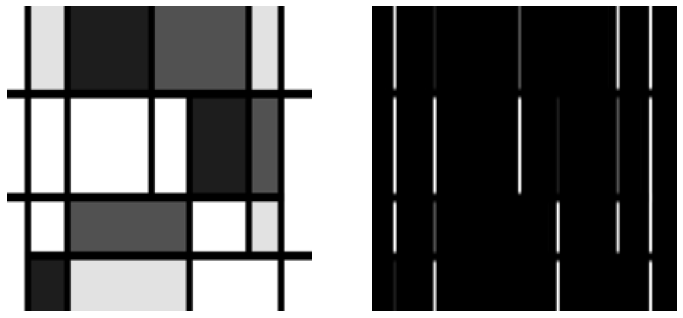

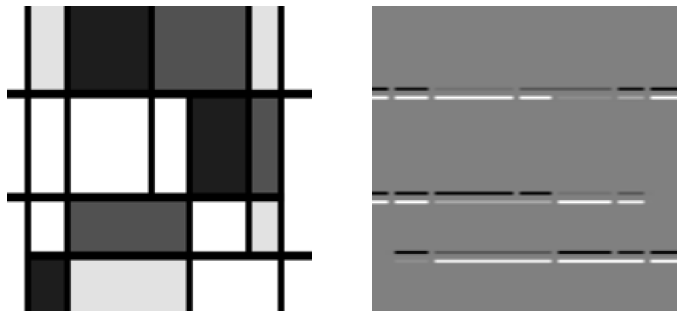

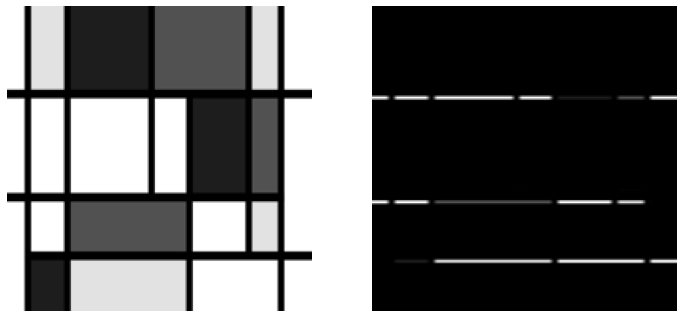

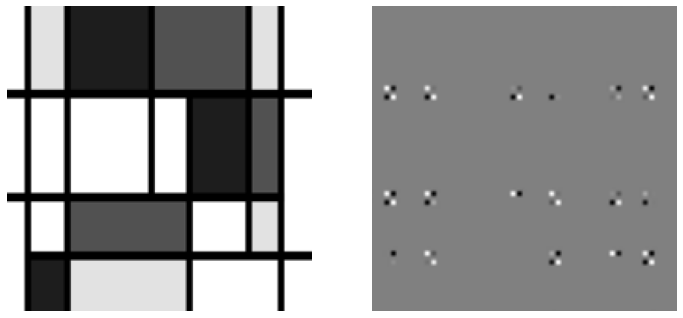

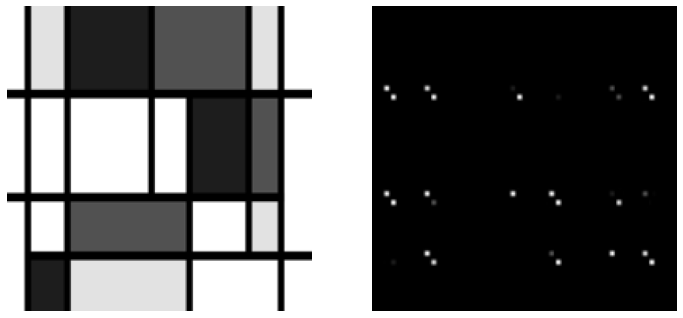

In [24]:
### JOUW CODE HIER

### EINDE JOUW CODE HIER